# **Author : Bankej Soni**
# Task : Prediction using unsupervised Machine Learning

### 1) IMPORTING THE DATA

In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2) LOADING AND READING THE DATA

In [75]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.shape

(150, 6)

### In this dataset, there are 4 features, sepal length, sepal width, petal length, and petal width and one label (Species).

### 3) CHECKING THE COUNT FOR EACH SPECIES

In [76]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### As we can see that the Dataset is a Balanced dataset and all the Classes have 50 instances.

### 4) UNDERSTANDING THE DATA

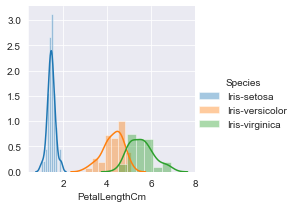

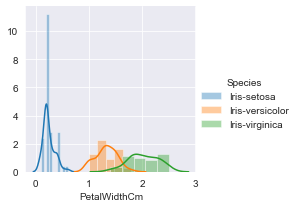

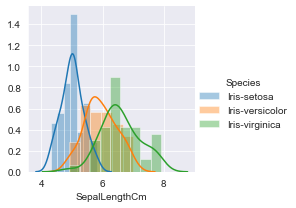

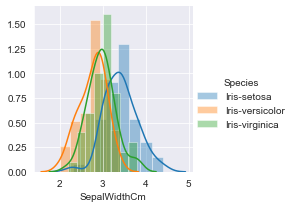

In [77]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend();
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend();

### From the above graphs, we can observe that :
### a. On the basis of petal widh and length, setosa is separable while the other two are overlapping
### b. On the basis of sepal width and length, all three are overlapping

<Figure size 360x360 with 0 Axes>

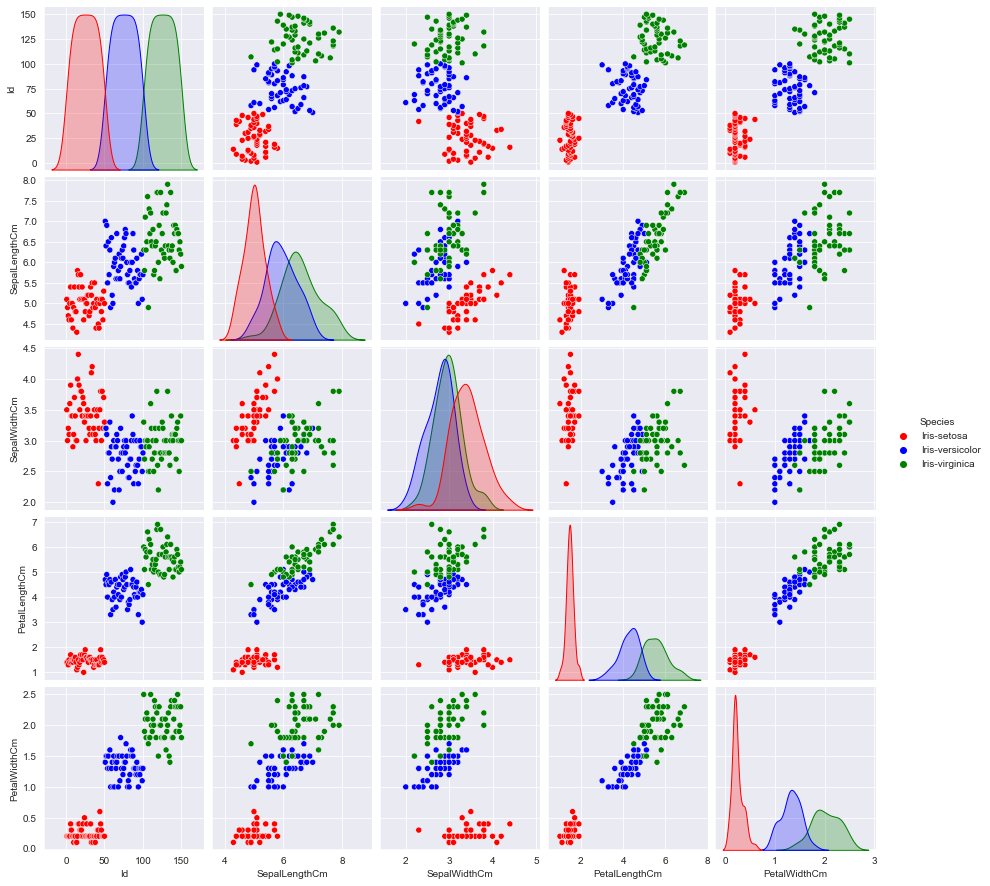

In [78]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.pairplot(data=iris, hue='Species', palette=['red','blue','green'])

### From the above graphs, we can observe that :
### a. Considering sepal length & sepal width, setosa is easily seperable but versicolor & virginica have some     overlapping
### b. Considering petal length & petal width, all 3 the species are quite seperable

### 5) MODELLING AND APPLYING THE K-MEANS CLUSTERING TO FIND THE OPTIMUM NUMBER OF CLUSTERS

In [79]:
x = iris.drop(['Species'],axis=1)
y = iris.Species

In [80]:
from sklearn.cluster import KMeans
wcss = []

feature = iris.iloc[:, [0, 1, 2, 3]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

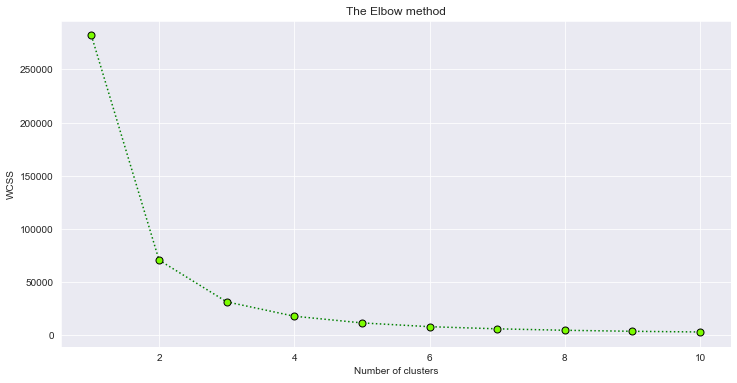

In [89]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss,'o:g', ms = 7, mec = 'black', mfc = 'lawngreen')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The optimum clusters are where the elbow curve happens. This is when the WCSS does not decrease significantly with each iteration
### Therefore, it is visible that "3" being the elbow point should be equal to the optimum number of clusters for this data

### 6) APPLYING K-MEANS CLUSTERING TO THE IRIS DATASET

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [83]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [84]:
centroids=kmeans.cluster_centers_
centroids

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

In [85]:
iris1=iris.copy()
iris1["Species"]=iris1["Species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
iris1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


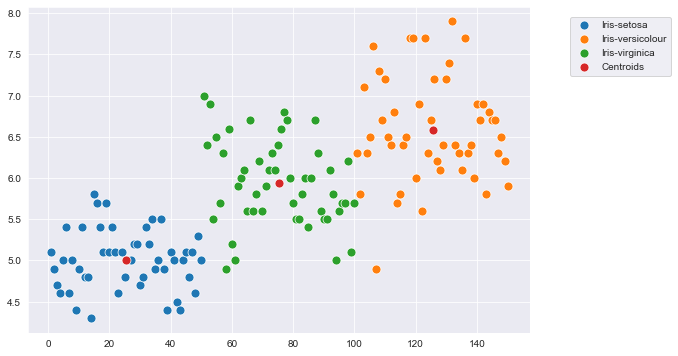

In [91]:
plt.figure(figsize = (9,6))
sns.scatterplot(x=feature[y_kmeans == 0, 0], y=feature[y_kmeans == 0, 1], s = 80, label = 'Iris-setosa')
sns.scatterplot(x=feature[y_kmeans == 1, 0], y=feature[y_kmeans == 1, 1], s = 80, label = 'Iris-versicolour')
sns.scatterplot(x=feature[y_kmeans == 2, 0], y=feature[y_kmeans == 2, 1], s = 80, label = 'Iris-virginica' )
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], s = 80, label = 'Centroids')
plt.legend(bbox_to_anchor = (1.3,1), borderaxespad = 1)

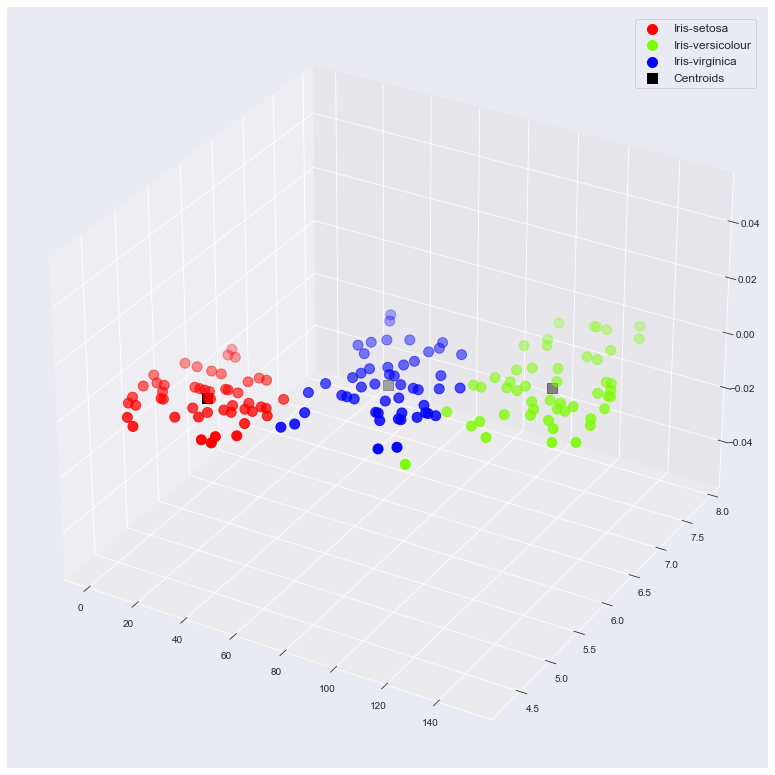

In [95]:
fig = plt.figure(figsize = (14,14))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x=feature[y_kmeans == 0, 0], y=feature[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x=feature[y_kmeans == 1, 0], y=feature[y_kmeans == 1, 1], s = 100, c = 'lawngreen',label = 'Iris-versicolour')
plt.scatter(x=feature[y_kmeans == 2, 0], y=feature[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], s = 100, marker = "s", c = 'black', 
            label = 'Centroids')

#displaying legends and plots
plt.legend(fontsize='large', borderaxespad = 1)
plt.show()